# OTC Stocks - possible Individual Project

- Can we predict whether an Over-the-Counter stock will go up or down?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import prep

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 250)


In [2]:
df = pd.read_csv('otc_0422_2022.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Symbol         227 non-null    object 
 1   Security Name  227 non-null    object 
 2   Tier           227 non-null    object 
 3   Price          227 non-null    float64
 4   Change %       227 non-null    float64
 5   Vol            227 non-null    int64  
 6   Sec Type       227 non-null    object 
 7   Country        227 non-null    object 
 8   State          227 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 16.1+ KB


,Symbol,Security Name,Tier,Price,Change %,Vol,Sec Type,Country,State
0,HVCW,HARRISON VICKERS&WATERMEL,Pink Current,0.00020,100.0000,10000000,Common Stock,USA,Georgia
1,UMAX,UMAX GROUP CORP,Pink Current,0.10625,90.5830,3515721,Common Stock,USA,California
2,TMMI,TMM INC,Pink Current,0.02150,45.2703,1288183,Common Stock,USA,South Carolina
3,EVIO,EVIO INC,Pink Limited,0.00020,42.8571,39359200,Common Stock,USA,Nevada
4,LCLP,LIFE CLIPS INC,Pink Current,0.01110,42.3077,167230887,Common Stock,USA,Florida


In [3]:
df.describe()

,Price,Change %,Vol
count,227.000000,227.000000,2.270000e+02
mean,0.009488,0.269011,2.623386e+07
std,0.026654,15.071536,6.473187e+07
min,0.000100,-33.333300,1.008063e+06
25%,0.000800,-7.089950,2.733142e+06
50%,0.002200,0.000000,7.321837e+06
75%,0.007450,4.057050,2.467004e+07
max,0.301200,100.000000,6.900678e+08


In [4]:
df = df.rename(columns= {
    'Symbol': 'symbol',
    'Security Name': 'sec_name',
    'Tier': 'tier',
    'Price': 'price',
    'Change %': 'change_pct',
    'Vol': 'vol',
    'Sec Type': 'sec_type',
    'Country': 'country',
    'State': 'state'

})

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   symbol      227 non-null    object 
 1   sec_name    227 non-null    object 
 2   tier        227 non-null    object 
 3   price       227 non-null    float64
 4   change_pct  227 non-null    float64
 5   vol         227 non-null    int64  
 6   sec_type    227 non-null    object 
 7   country     227 non-null    object 
 8   state       227 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 16.1+ KB


,symbol,sec_name,tier,price,change_pct,vol,sec_type,country,state
0,HVCW,HARRISON VICKERS&WATERMEL,Pink Current,0.00020,100.0000,10000000,Common Stock,USA,Georgia
1,UMAX,UMAX GROUP CORP,Pink Current,0.10625,90.5830,3515721,Common Stock,USA,California
2,TMMI,TMM INC,Pink Current,0.02150,45.2703,1288183,Common Stock,USA,South Carolina
3,EVIO,EVIO INC,Pink Limited,0.00020,42.8571,39359200,Common Stock,USA,Nevada
4,LCLP,LIFE CLIPS INC,Pink Current,0.01110,42.3077,167230887,Common Stock,USA,Florida


In [5]:
#Dropping country column because USA was preselected in data download
df = df.drop(columns= ['country'])

df.head()

,symbol,sec_name,tier,price,change_pct,vol,sec_type,state
0,HVCW,HARRISON VICKERS&WATERMEL,Pink Current,0.00020,100.0000,10000000,Common Stock,Georgia
1,UMAX,UMAX GROUP CORP,Pink Current,0.10625,90.5830,3515721,Common Stock,California
2,TMMI,TMM INC,Pink Current,0.02150,45.2703,1288183,Common Stock,South Carolina
3,EVIO,EVIO INC,Pink Limited,0.00020,42.8571,39359200,Common Stock,Nevada
4,LCLP,LIFE CLIPS INC,Pink Current,0.01110,42.3077,167230887,Common Stock,Florida


In [6]:
df.tier.value_counts()

Pink Current    198
Pink Limited     29
Name: tier, dtype: int64

In [7]:
df.sec_type.value_counts()

Common Stock               224
Foreign Ordinary Shares      3
Name: sec_type, dtype: int64

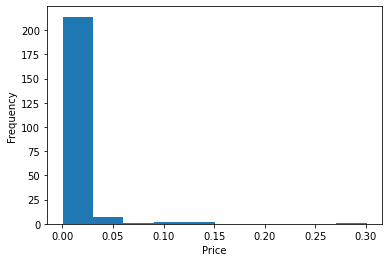

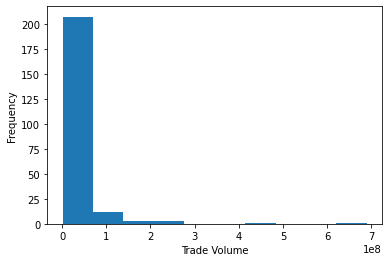

Text(0.5, 0, 'Price Change Percentage')

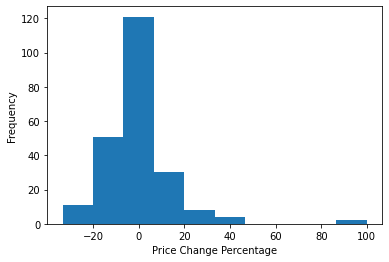

In [18]:
df.price.plot.hist()
plt.xlabel('Price')
plt.show()
df.vol.plot.hist()
plt.xlabel('Trade Volume')
plt.show()
df.change_pct.plot.hist()
plt.xlabel('Price Change Percentage')

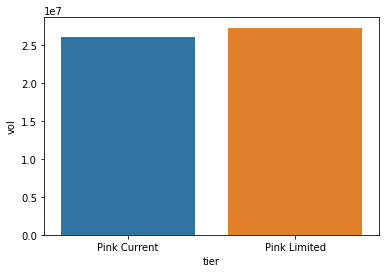

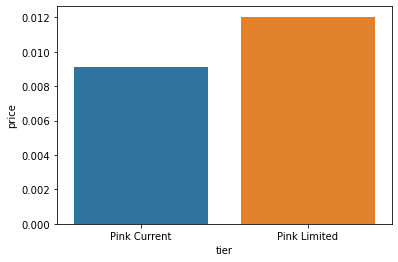

<AxesSubplot:xlabel='tier', ylabel='change_pct'>

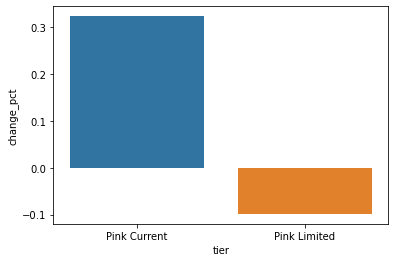

In [11]:
sns.barplot(data= df, x='tier', y='vol', ci=None)
plt.show()
sns.barplot(data= df, x='tier', y='price', ci=None)
plt.show()
sns.barplot(data= df, x='tier', y='change_pct', ci=None)

In [8]:
df.describe()

,price,change_pct,vol
count,227.000000,227.000000,2.270000e+02
mean,0.009488,0.269011,2.623386e+07
std,0.026654,15.071536,6.473187e+07
min,0.000100,-33.333300,1.008063e+06
25%,0.000800,-7.089950,2.733142e+06
50%,0.002200,0.000000,7.321837e+06
75%,0.007450,4.057050,2.467004e+07
max,0.301200,100.000000,6.900678e+08


In [9]:
symbols = df.symbol.to_list()
symbols

['HVCW',
 'UMAX',
 'TMMI',
 'EVIO',
 'LCLP',
 'GFTX',
 'AFOM',
 'EEGI',
 'TSPG',
 'HCMC',
 'BYOC',
 'PSWW',
 'TXTM',
 'PDPG',
 'ATYG',
 'PTOP',
 'HQGE',
 'TONR',
 'BLDV',
 'GSFI',
 'GRST',
 'EESO',
 'VPER',
 'NBRI',
 'LGBS',
 'ALKM',
 'DRNK',
 'HMLA',
 'MWWC',
 'CSLI',
 'CIVX',
 'SBES',
 'INCC',
 'GTXO',
 'FBCD',
 'CATV',
 'MAPT',
 'BBBT',
 'MMMM',
 'XFLS',
 'INKW',
 'PCLI',
 'PPJE',
 'GXXM',
 'AXXA',
 'PAOG',
 'GRCU',
 'IDVV',
 'SPRV',
 'WDLF',
 'CBGL',
 'TSOI',
 'ATIG',
 'PRDL',
 'HIRU',
 'MLFB',
 'SHOM',
 'LVVV',
 'ITOX',
 'PVSP',
 'IFXY',
 'ERBB',
 'MJNA',
 'UATG',
 'NEWH',
 'KATX',
 'INTK',
 'OWUV',
 'VDRM',
 'BYRG',
 'BTDG',
 'NSPT',
 'PLPL',
 'DUTV',
 'GTLL',
 'SNMN',
 'UAMM',
 'PRPM',
 'TGRO',
 'ICTY',
 'SMCE',
 'VGLS',
 'PBHG',
 'CBYI',
 'NPHC',
 'GBHL',
 'BLLB',
 'GNCP',
 'BIEL',
 'AUNXF',
 'VNUE',
 'VAYK',
 'NECA',
 'CBDL',
 'GMEV',
 'GRLT',
 'CHNC',
 'BRGO',
 'CGAC',
 'MAXD',
 'XTRM',
 'AAGC',
 'MCOA',
 'ECEZ',
 'NNRX',
 'SPRJ',
 'PBYA',
 'GTEH',
 'FTXP',
 'OPTI',
 'VXIT',


In [20]:
train, validate, test = prep.get_splits(df)

print(train.shape, validate.shape, test.shape)

(126, 8) (55, 8) (46, 8)


In [23]:
train.info()
train.sample(50)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 111 to 33
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   symbol      126 non-null    object 
 1   sec_name    126 non-null    object 
 2   tier        126 non-null    object 
 3   price       126 non-null    float64
 4   change_pct  126 non-null    float64
 5   vol         126 non-null    int64  
 6   sec_type    126 non-null    object 
 7   state       126 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 12.9+ KB


,symbol,sec_name,tier,price,change_pct,vol,sec_type,state
18,BLDV,BLUE DIAMOND VENTURES INC,Pink Limited,0.00130,18.1818,2966733,Common Stock,Illinois
74,GTLL,GLOBAL TECHS LTD,Pink Current,0.00030,0.0000,140153657,Common Stock,Florida
114,JAMN,JAMMIN JAVA CORP,Pink Limited,0.00010,0.0000,23706304,Common Stock,Nevada
187,RDAR,RAADR INC,Pink Current,0.00045,-10.0000,9399620,Common Stock,Arizona
61,ERBB,AMERICAN GREEN INC,Pink Current,0.00350,2.9412,8766351,Common Stock,Arizona
43,GXXM,GEX MGMT INC,Pink Limited,0.00640,6.6667,9595371,Common Stock,Texas
51,TSOI,THERAPEUTIC SLTNS INTL,Pink Current,0.02830,4.8148,5526489,Common Stock,Idaho
0,HVCW,HARRISON VICKERS&WATERMEL,Pink Current,0.00020,100.0000,10000000,Common Stock,Georgia
156,AMBS,AMARANTUS BIOSCIENCE HLDG,Pink Current,0.00450,-5.4622,1210034,Common Stock,New York
29,CSLI,CRITICAL SOLUTIONS INC,Pink Current,0.00430,13.1579,6823972,Common Stock,Wyoming


Text(0.5, 1.0, 'Price vs Percent change')

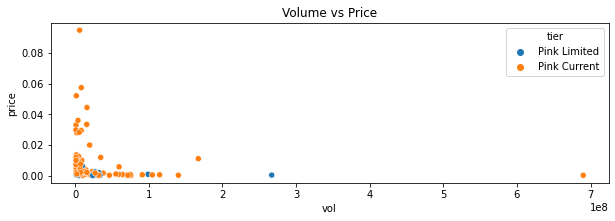

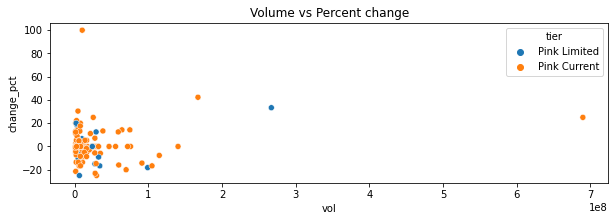

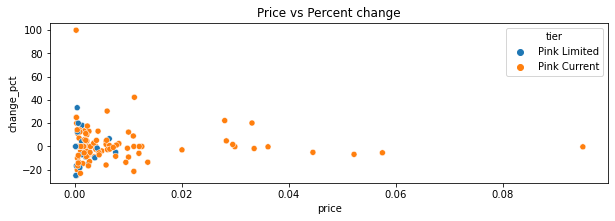

In [29]:
plt.figure(figsize=(10,10))

plt.subplot(311)
sns.scatterplot(data= train, x='vol', y='price', hue='tier')
plt.title('Volume vs Price')

plt.figure(figsize=(10,10))
plt.subplot(312)
sns.scatterplot(data= train, x='vol', y='change_pct', hue='tier')
plt.title('Volume vs Percent change')

plt.figure(figsize=(10,10))
plt.subplot(313)
sns.scatterplot(data= train, x='price', y='change_pct', hue='tier')
plt.title('Price vs Percent change')

In [15]:
import requests
import re
import urllib.request as ur


In [30]:
wheat_importers = pd.read_excel('GTRTable15.xlsx')
wheat_importers.info()
wheat_importers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      float64
 1   Unnamed: 1   0 non-null      float64
 2   Unnamed: 2   0 non-null      float64
 3   Unnamed: 3   0 non-null      float64
 4   Unnamed: 4   0 non-null      float64
 5   Unnamed: 5   0 non-null      float64
 6   Unnamed: 6   0 non-null      float64
 7   Unnamed: 7   0 non-null      float64
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  0 non-null      float64
 11  Unnamed: 11  0 non-null      float64
 12  Unnamed: 12  3 non-null      object 
 13  Unnamed: 13  1 non-null      object 
dtypes: float64(12), object(2)
memory usage: 2.2+ KB


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
world_dev_ind = pd.read_csv('WDIData.csv')

world_dev_ind.info()
world_dev_ind.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383838 entries, 0 to 383837
Data columns (total 67 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    383838 non-null  object 
 1   Country Code    383838 non-null  object 
 2   Indicator Name  383838 non-null  object 
 3   Indicator Code  383838 non-null  object 
 4   1960            37306 non-null   float64
 5   1961            42355 non-null   float64
 6   1962            44599 non-null   float64
 7   1963            44449 non-null   float64
 8   1964            44990 non-null   float64
 9   1965            47183 non-null   float64
 10  1966            47213 non-null   float64
 11  1967            48962 non-null   float64
 12  1968            48544 non-null   float64
 13  1969            50390 non-null   float64
 14  1970            69081 non-null   float64
 15  1971            76036 non-null   float64
 16  1972            79137 non-null   float64
 17  1973      

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for cooking (% of population),EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.469146,11.836171,12.153818,12.566328,12.963729,13.429404,13.866013,14.309472,14.773776,15.241222,15.658101,16.097824,16.511262,16.966046,17.411737,17.808234,18.179760,18.558937,18.949636,19.333168,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.086007,23.103178,24.223430,25.023184,26.176336,23.621498,27.299433,28.737952,28.813735,27.483061,28.233373,28.381836,32.224027,32.046478,31.323579,33.312163,38.380433,39.754201,42.168241,43.640661,NaN,NaN,NaN
2,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural population)",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.491610,13.201875,15.209347,13.813535,15.423615,10.958840,16.762469,14.417102,16.977975,18.173341,16.241064,15.295950,20.525353,19.461383,17.790698,16.553470,23.907897,24.624725,26.813900,28.841150,NaN,NaN,NaN
3,Africa Eastern and Southern,AFE,"Access to electricity, urban (% of urban population)",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.083452,54.770123,56.102330,57.094310,57.836866,58.953365,59.546975,59.598959,60.983400,61.227255,62.520824,65.470615,66.303599,66.496010,65.828988,66.926692,68.722184,71.085418,71.994933,73.589886,NaN,NaN,NaN
4,Africa Eastern and Southern,AFE,Account ownership at a financial institution or with a mobile-money-service provider (...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
world_dev_ind['Indicator Name'].value_counts().sort_values(ascending=False)

Access to clean fuels and technologies for cooking (% of population)                                                       266
Adjusted net national income (constant 2015 US$)                                                                           266
Access to electricity, urban (% of urban population)                                                                       266
Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)            266
Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)    266
                                                                                                                          ... 
Women who were first married by age 15 (% of women ages 20-24)                                                             266
Women who were first married by age 18 (% of women ages 20-24)                                                 

In [3]:
from wrangle import col_null_analysis, row_null_analysis

col_nulls = col_null_analysis(world_dev_ind)

col_nulls

,null_counts,null_pct
Country Name,0,0.000000
Country Code,0,0.000000
Indicator Name,0,0.000000
Indicator Code,0,0.000000
1960,346532,90.280796
1961,341483,88.965397
1962,339239,88.380775
1963,339389,88.419854
1964,338848,88.278909
1965,336655,87.707575


In [11]:
ind_row_nulls = row_null_analysis(world_dev_ind)

ind_row_nulls

,row_null_count,row_null_pct
0,43,64.179104
1,43,64.179104
2,43,64.179104
3,43,64.179104
4,63,94.029851
...,...,...
383833,59,88.059701
383834,56,83.582090
383835,54,80.597015
383836,32,47.761194


In [4]:
world_dev_countries = pd.read_csv('WDICountry.csv')

world_dev_countries.info()
world_dev_countries.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 31 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       265 non-null    object 
 1   Short Name                                         265 non-null    object 
 2   Table Name                                         265 non-null    object 
 3   Long Name                                          265 non-null    object 
 4   2-alpha code                                       263 non-null    object 
 5   Currency Unit                                      217 non-null    object 
 6   Special Notes                                      123 non-null    object 
 7   Region                                             217 non-null    object 
 8   Income Group                                       216 non-null    object 
 9   WB-2 code 

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Unnamed: 30
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,NaN,Latin America & Caribbean,High income,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accounts methodology,NaN,NaN,BPM6,NaN,General trade system,NaN,Enhanced General Data Dissemination System (e-GDDS),2020 (expected),NaN,NaN,Yes,NaN,NaN,2018.0,NaN
1,AFE,Africa Eastern and Southern,Africa Eastern and Southern,Africa Eastern and Southern,ZH,NaN,"26 countries, stretching from the Red Sea in the North to the Cape of Good Hope in the...",NaN,NaN,ZH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,The reporting period for national accounts data is designated as either calendar year ...,South Asia,Low income,AF,2016,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accounts methodology,NaN,NaN,BPM6,Actual,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-GDDS),1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2018.0,NaN
3,AFW,Africa Western and Central,Africa Western and Central,Africa Western and Central,ZI,NaN,"22 countries, stretching from the westernmost point of Africa, across the equator, and...",NaN,NaN,ZI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,NaN,Sub-Saharan Africa,Lower middle income,AO,2002,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accounts methodology,NaN,NaN,BPM6,Actual,General trade system,Budgetary central government,Enhanced General Data Dissemination System (e-GDDS),2014,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2008/09",NaN,NaN,NaN,2018.0,NaN


In [10]:
world_dev_countries['Income Group'].value_counts()

High income            79
Lower middle income    55
Upper middle income    55
Low income             27
Name: Income Group, dtype: int64

In [5]:
wdi_country_series = pd.read_csv('WDICountry-Series.csv')
wdi_country_series.info()
wdi_country_series.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8013 entries, 0 to 8012
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  8013 non-null   object 
 1   SeriesCode   8013 non-null   object 
 2   DESCRIPTION  8013 non-null   object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 250.5+ KB


,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,IT.MLT.MAIN,Servicio di Telecomunicacion di Aruba (SETAR). Directorate of Telecommunication Affair...,NaN
1,ABW,ST.INT.ARVL,Includes overnight visitors (tourists) and same-day visitors (excursionists). Arrivals...,NaN
2,ABW,SP.DYN.CBRT.IN,Data source: United Nations World Population Prospects,NaN
3,ABW,ST.INT.XPND.CD,Compiled from data reported in the International Monetary Fund's Balance of Payment St...,NaN
4,ABW,IT.NET.BBND.P2,Servicio di Telecomunicacion di Aruba (SETAR). Directorate of Telecommunication Affair...,NaN


In [6]:
wdi_series = pd.read_csv('WDISeries.csv')
wdi_series.info()
wdi_series.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          1443 non-null   object 
 1   Topic                                1443 non-null   object 
 2   Indicator Name                       1443 non-null   object 
 3   Short definition                     192 non-null    object 
 4   Long definition                      1435 non-null   object 
 5   Unit of measure                      25 non-null     object 
 6   Periodicity                          1421 non-null   object 
 7   Base Period                          73 non-null     object 
 8   Other notes                          5 non-null      object 
 9   Aggregation method                   1045 non-null   object 
 10  Limitations and exceptions           839 non-null    object 
 11  Notes from original source    

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,AG.AGR.TRAC.NO,Environment: Agricultural production,"Agricultural machinery, tractors",NaN,Agricultural machinery refers to the number of wheel and crawler tractors (excluding g...,NaN,Annual,NaN,NaN,Sum,The data are collected by the Food and Agriculture Organization of the United Nations ...,NaN,NaN,"Food and Agriculture Organization, electronic files and web site.","A tractor provides the power and traction to mechanize agricultural tasks, especially ...",Agricultural land covers more than one-third of the world's land area. In many industr...,NaN,NaN,NaN,CC BY-4.0,NaN
1,AG.CON.FERT.PT.ZS,Environment: Agricultural production,Fertilizer consumption (% of fertilizer production),NaN,Fertilizer consumption measures the quantity of plant nutrients used per unit of arabl...,NaN,Annual,NaN,NaN,Weighted average,The FAO has revised the time series for fertilizer consumption and irrigation for 2002...,NaN,NaN,"Food and Agriculture Organization, electronic files and web site.","Fertilizer consumption measures the quantity of plant nutrients, and is calculated as ...","Factors such as the green revolution, has led to impressive progress in increasing cro...",NaN,NaN,NaN,CC BY-4.0,NaN
2,AG.CON.FERT.ZS,Environment: Agricultural production,Fertilizer consumption (kilograms per hectare of arable land),NaN,Fertilizer consumption measures the quantity of plant nutrients used per unit of arabl...,NaN,Annual,NaN,NaN,Weighted average,The FAO has revised the time series for fertilizer consumption and irrigation for 2002...,NaN,NaN,"Food and Agriculture Organization, electronic files and web site.","Fertilizer consumption measures the quantity of plant nutrients, and is calculated as ...","Factors such as the green revolution, has led to impressive progress in increasing cro...",NaN,NaN,NaN,CC BY-4.0,NaN
3,AG.LND.AGRI.K2,Environment: Land use,Agricultural land (sq. km),NaN,"Agricultural land refers to the share of land area that is arable, under permanent cro...",NaN,Annual,NaN,NaN,Sum,The data are collected by the Food and Agriculture Organization of the United Nations ...,NaN,NaN,"Food and Agriculture Organization, electronic files and web site.","Agricultural land constitutes only a part of any country's total area, which can inclu...",Agricultural land covers more than one-third of the world's land area. In many industr...,NaN,NaN,NaN,CC BY-4.0,NaN
4,AG.LND.AGRI.ZS,Environment: Land use,Agricultural land (% of land area),NaN,"Agricultural land refers to the share of land area that is arable, under permanent cro...",NaN,Annual,NaN,NaN,Weighted average,The data are collected by the Food and Agriculture Organization of the United Nations ...,NaN,NaN,"Food and Agriculture Organization, electronic files and web site.","Agriculture is still a major sector in many economies, and agricultural activities pro...","Agricultural land covers more than one-third of the world's land area, with arable lan...",NaN,NaN,NaN,CC BY-4.0,NaN


In [7]:
wdi_st = pd.read_csv('WDISeries-Time.csv')
wdi_st.info()
wdi_st.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SeriesCode   501 non-null    object 
 1   Year         501 non-null    object 
 2   DESCRIPTION  501 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 15.8+ KB


,SeriesCode,Year,DESCRIPTION,Unnamed: 3
0,SP.DYN.AMRT.FE,YR1960,"Interpolated using data for 1957 and 1962, if the data source is United Nations World ...",NaN
1,SP.DYN.TO65.MA.ZS,YR1960,Interpolated using data for 1957 and 1962.,NaN
2,SP.DYN.TO65.FE.ZS,YR1960,Interpolated using data for 1957 and 1962.,NaN
3,SP.ADO.TFRT,YR1960,Interpolated using data for 1957 and 1962.,NaN
4,SP.DYN.AMRT.MA,YR1960,"Interpolated using data for 1957 and 1962, if the data source is United Nations World ...",NaN


In [8]:
wdi_st.Year.value_counts()

YR2000        25
YR2010        22
YR1990        20
YR2017        19
YR2020        18
YR2018        13
YR2016        12
YR2002        11
YR2003        11
YR2004        11
YR2005        11
YR2006        11
YR2007        11
YR2012        11
YR2011         7
YR2013         7
YR1962         7
YR1992         7
YR2002         7
YR1967         7
YR2015         7
YR1987         7
YR1972         7
YR1997         7
YR1982         7
YR2007         7
YR1977         7
YR2014         6
YR2008         6
YR2019         6
YR2009         6
YR2005         5
YR2006         5
YR2003         5
YR1998         5
YR2001         5
YR1999         5
YR2004         5
YR1960         5
YR1996         5
YR1995         5
YR1963         5
YR1964         5
YR1965         5
YR1966         5
YR1968         5
YR1969         5
YR1970         5
YR1971         5
YR1973         5
YR1974         5
YR1975         5
YR1976         5
YR1978         5
YR1979         5
YR1980         5
YR1981         5
YR1983         5
YR1984        